In [223]:
import os
import json

import pandas as pd


def read_latest_pages() -> dict:
    files = os.listdir("data")
    files = [f for f in files if f.endswith(".json")]
    filenname = max(files)
    path = os.path.join("data", filenname)
    
    dic = json.load(open(path))
    return dic


def clean_last_change(df: pd.DataFrame):
    lcs = []
    for i in range(len(df)):
        lc = df.iloc[i]["last_change"].strip().lower()
        lc = lc.split(" ")[2:4]
        lc[0] = lc[0].replace(",", "")
        lc = " ".join(lc)
        lc = pd.to_datetime(lc)
        lcs.append(lc)
    df["last_change"] = lc


def clean_prices(df: pd.DataFrame):
    prices = []
    for i in range(len(df)):
        price = df.iloc[i]["price_info"]["Kaufpreis"]
        price = price.replace("€", "").replace(".", "").replace(",", ".").strip()
        price = float(price)
        prices.append(price)
    df["price"] = prices

    has_broker_commission = []
    for i in range(len(df)):
        bc = df.iloc[i]["price_info"]
        bc_keys = [k.strip().lower() for k in bc.keys()]
        has_bc = any(["provision" in k for k in bc_keys])
        has_broker_commission.append(has_bc)
    df["has_broker_commission"] = has_broker_commission

    df.drop(columns=["price_info"], inplace=True)


dic = read_latest_pages()
df = pd.DataFrame(dic).T

clean_last_change(df)
clean_prices(df)

df.drop(columns=["energy_certificate"], inplace=True)

df


/var/folders/bh/4ympj4l52bs8wxpg114kdh1m0000gn/T/ipykernel_17604/1406136181.py:24: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  lc = pd.to_datetime(lc)


,url,title,last_change,address,attributes,descriptions,price,has_broker_commission
0,https://www.willhaben.at/iad/immobilien/d/eige...,Kompakter 1-Zimmer Wohnhit in Liesing,2024-03-26 20:35:00,"1230 Wien, 23. Bezirk, Liesing","{'Objekttyp': 'Wohnung', 'Bautyp': 'Altbau', '...",{'description_general': 'Zum Verkauf steht ein...,129000.00,True
1,https://www.willhaben.at/iad/immobilien/d/eige...,++++PREISSTURZ - GELEGENHEIT MIT WOHNBAUFÖRDER...,2024-03-26 20:35:00,"3465 Königsbrunn am Wagram, Tulln, Niederöster...","{'Objekttyp': 'Wohnung', 'Bautyp': 'Neubau', '...",{'description_general': 'Erst vor wenigen Tage...,145000.00,True
2,https://www.willhaben.at/iad/immobilien/d/eige...,RUHIG GELEGENE STARTER-/SINGLEWOHNUNG IM 1. LI...,2024-03-26 20:35:00,"Randhartingergasse, 1100 Wien, 10. Bezirk, Fav...","{'Objekttyp': 'Wohnung', 'Bautyp': 'Altbau', '...",{'description_general': 'Grundbuch statt Sparb...,127000.00,True
3,https://www.willhaben.at/iad/immobilien/d/eige...,#SQ - UNBEFRISTET VERMIETET ALTBAUWOHNUNG IN T...,2024-03-26 20:35:00,"1150 Wien, 15. Bezirk, Rudolfsheim-Fünfhaus","{'Objekttyp': 'Wohnung', 'Bautyp': 'Altbau', '...",{'description_general': 'Zum Verkauf gelangt e...,135000.00,True
4,https://www.willhaben.at/iad/immobilien/d/eige...,"Jetzt investieren und profitieren: 1,5-Zimmer-...",2024-03-26 20:35:00,"Columbusgasse 70, 1100 Wien, 10. Bezirk, Favor...","{'Objekttyp': 'Wohnung', 'Bautyp': 'Altbau', '...","{'description_general': 'Tolle Single-, Studen...",119005.00,True
...,...,...,...,...,...,...,...,...
435,https://www.willhaben.at/iad/immobilien/d/eige...,2 Zimmer EIGENTUMSWOHNUNG in Top-Lage 1220 Wi...,2024-03-26 20:35:00,"1220 Wien, 22. Bezirk, Donaustadt","{'Objekttyp': 'Wohnung', 'Bautyp': 'Altbau', '...",{'description_general': '!!! ANLEGERHIT !!!122...,149000.00,True
436,https://www.willhaben.at/iad/immobilien/d/eige...,WOHNGLÜCK AUF 30 m² | KLEIN - FEIN - UND ALLES...,2024-03-26 20:35:00,"1140 Wien, 14. Bezirk, Penzing","{'Objekttyp': 'Wohnung', 'Bautyp': 'Altbau', '...",{'description_general': 'b>Single-Wohnung mit ...,135000.00,True
437,https://www.willhaben.at/iad/immobilien/d/eige...,Klein aber fein - Meine Garçonnière in Toplage,2024-03-26 20:35:00,"1090 Wien, 09. Bezirk, Alsergrund","{'Objekttyp': 'Wohnung', 'Bautyp': 'Altbau', '...",{'description_general': 'Wer eine kleine Wohnu...,135000.00,True
438,https://www.willhaben.at/iad/immobilien/d/eige...,TOP-PREIS,2024-03-26 20:35:00,"1100 Wien, 10. Bezirk, Favoriten","{'Objekttyp': 'Wohnung', 'Zustand': 'Sanierung...",{'description_general': 'TOP-PREIS Die helle ...,136000.00,True


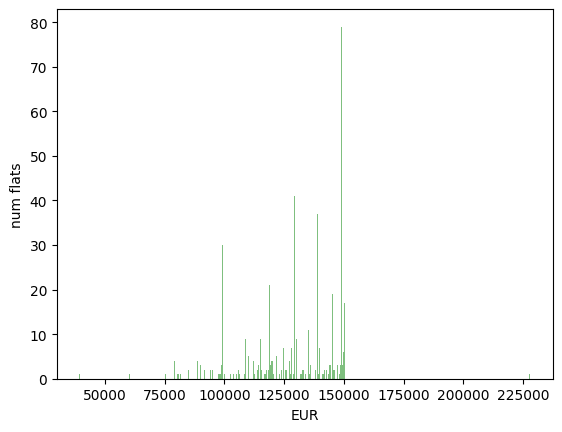

In [81]:

# add price column
for i in range(df.shape[0]):
    price = df.iloc[i]["price_info"]["Kaufpreis"]
    price = price.replace("€", "").replace(".", "").replace(",", ".").strip()
    price = float(price)
    # print(price)


# price distribution

import matplotlib.pyplot as plt


prices = [get_price(df, i) for i in range(len(df))]

plt.hist(prices, bins=len(prices) // 1, color="green", alpha=0.5)
plt.xlabel("EUR")
plt.ylabel("num flats")
plt.show()


In [ ]:
# neubau vs. altbau
